# Particle Collision Classification using Support Vector Machines

# Introduction

This notebook explores the application of Support Vector Machines (SVM) to classify particle collisions from the HIGGS dataset. The dataset contains simulated collision events, with each event either being a signal process producing Higgs bosons (class 1) or a background process (class 0).

### Dataset Overview
The HIGGS dataset contains 28 features derived from particle physics measurements, including:
- Low-level features: Raw measurements like particle momentum (pT), pseudorapidity (eta), and azimuthal angle (phi)
- High-level features: Derived quantities like invariant masses of particle combinations

### SVM Classification Approach
We'll use Support Vector Machines with different kernel functions to classify these collision events:

- Linear kernel: For linearly separable data
- RBF (Gaussian) kernel: For non-linear decision boundaries
- Polynomial kernel: For capturing higher-order feature interactions
- Custom hybrid kernel: Combining multiple kernels to leverage different aspects of the data

The choice of kernel is crucial as it determines how the SVM algorithm maps the input features to a higher-dimensional space where the classes become separable. We'll experiment with various kernel parameters to optimize the classification performance.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


### Reading the dataset

The dataset 

The dataset HIGGs does not have the column headings, which means we need to set "header = None" so that we do not lose one data point when converting to pandas dataframe 


In [37]:
# The following lines were used to unzip the dataset and convert to csv (need not be run again, as the current
# uploaded files has the smaller version of it)

# df = pd.read_csv('HIGGS.csv', header = None)
# df

In [38]:
# column_names = ['class',
#     'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
#     'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_btag',
#     'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_btag',
#     'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_btag',
#     'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_btag',
#     'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
# ]

# df.columns = column_names

### Sampling

Stratified Sampling - TODO Explain

In [39]:
# df = df.groupby('class').apply(lambda x: x.sample(frac=.01, random_state=42)).reset_index(drop = True)
# df.to_csv('HIGGS_smaller_updated.csv', index = False)

In [40]:
df = pd.read_csv('HIGGS_smaller_updated.csv')
df

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,0.795907,0.521993,1.266055,1.193820,-1.345527,1.050368,0.023740,-0.202843,0.000000,...,1.112191,0.023700,0.000000,1.042175,1.027780,0.985253,0.817024,0.931846,0.893235,0.815815
1,0.0,0.439039,-0.246468,-1.633201,2.165616,-1.280181,1.113852,0.099988,0.030652,0.000000,...,1.272093,1.334957,3.101961,0.847423,1.107451,0.992869,0.645746,0.615797,1.053485,1.169667
2,0.0,0.792429,-0.225041,0.476488,0.216189,-0.653596,0.706933,-1.342777,1.307932,2.173076,...,-1.075636,-1.354807,3.101961,0.812245,0.768737,0.984995,0.809043,0.516027,0.810711,0.770562
3,0.0,2.508689,0.605754,0.057012,1.908093,0.369292,1.448035,1.172407,-1.662516,2.173076,...,1.333722,-1.187779,0.000000,0.483426,0.583755,0.980170,1.504814,0.745402,1.502971,1.080458
4,0.0,0.956040,-0.425679,0.380497,0.382192,1.287647,1.112112,1.256576,0.019010,2.173076,...,-1.447075,0.845525,0.000000,1.010567,1.105782,0.990340,1.734094,1.841294,1.493804,1.189773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1.0,1.326267,-1.027591,-0.629456,1.147094,-0.038268,1.000717,-0.334723,1.111683,2.173076,...,0.176098,-0.395917,0.000000,0.471924,0.605922,0.988520,0.860052,1.002536,1.008905,0.764430
109996,1.0,0.534753,-1.201932,-0.766507,0.721336,-1.586289,0.814297,-0.636743,0.779613,0.000000,...,1.446986,0.315584,0.000000,0.903345,0.907817,0.989411,0.542765,0.531479,0.656743,0.770066
109997,1.0,0.524138,1.794970,0.293383,0.789934,1.561737,0.736888,1.280342,-0.677391,2.173076,...,2.052449,-0.951386,0.000000,0.932308,0.815919,0.987882,0.829535,0.607425,0.616863,0.606310
109998,1.0,0.971595,0.186948,-0.499616,1.675635,-0.546097,0.918546,-0.355518,1.199275,2.173076,...,0.028688,1.523072,0.000000,0.743745,0.679649,0.981990,1.026166,0.623709,1.111592,0.875511


### Constants

The section below sets all the constants that might be required in the notebook.

In [41]:
RANDOM_STATE = 42
y_col = "class"

### Quick Feature Analysis

Data Types

Verifying whether all the data points have numerical values (since the original data did not have header)


In [42]:
df.dtypes 

class                       float64
lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_btag                  float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_btag                  float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_btag                  float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_btag                  float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

#### Missing Value Analysis

None of the columns have missing values, hence no need to perform any data imputations

In [43]:
df.isna().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_btag                  0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_btag                  0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_btag                  0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_btag                  0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

#### Target Variable Analysis

Class with value 1 represents SIGNAL (53% of the data), and Class with value 0 represents BACKGROUND (47% of the data)

Looks like there is very little imbalance in data. 

In [44]:
df[y_col].value_counts() / len(df)

class
1.0    0.529918
0.0    0.470082
Name: count, dtype: float64

### Simple Statistcal Analysis

Using the `describe` function we can see some simple statistics of all the columns. Given there are so many columns, it is hard to see understand the distrubtion and what each columns represent. Hence we will then move to plots to understand better.

In [45]:
df.describe()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.529918,0.990136,-0.005788,0.001553,1.000278,0.001863,0.990156,0.001501,-0.003962,1.001442,...,0.000049,0.000948,1.001539,1.036259,1.024668,1.050452,1.010970,0.970571,1.032646,0.959388
std,0.499106,0.566492,1.008337,1.005915,0.601879,1.007750,0.475149,1.008162,1.005865,1.027335,...,1.011076,1.006068,1.400639,0.679834,0.381036,0.164679,0.396363,0.521311,0.364397,0.313120
min,0.000000,0.274697,-2.433028,-1.742508,0.002473,-1.743944,0.138602,-2.967745,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.102873,0.271377,0.133199,0.228777,0.066276,0.359259,0.381396
25%,0.000000,0.588740,-0.744166,-0.870266,0.577160,-0.870849,0.680000,-0.681304,-0.875857,0.000000,...,-0.714190,-0.868149,0.000000,0.790204,0.845568,0.985777,0.769679,0.672573,0.820276,0.770350
50%,1.000000,0.851724,-0.006872,0.000971,0.892844,0.001734,0.893995,-0.004977,-0.004100,1.086538,...,-0.002126,-0.004149,0.000000,0.894896,0.950084,0.989766,0.918934,0.872941,0.946992,0.872299
75%,1.000000,1.233481,0.732370,0.875988,1.296042,0.876362,1.167809,0.687194,0.862769,2.173076,...,0.714934,0.871744,3.101961,1.024735,1.083739,1.019925,1.142902,1.136033,1.139619,1.057903
max,1.000000,8.170258,2.434868,1.743236,9.420980,1.743257,7.400489,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.852451,9.749496,5.425464,7.573939,9.879900,8.050391,5.949618


### Plots

#### Histogram Plots

Given all the fields are numerical, it makes sense to first see what the data distribution (histogram) looks like. We plot the histograms in differnt colors for different class to see if there is anything we can understand from the data.

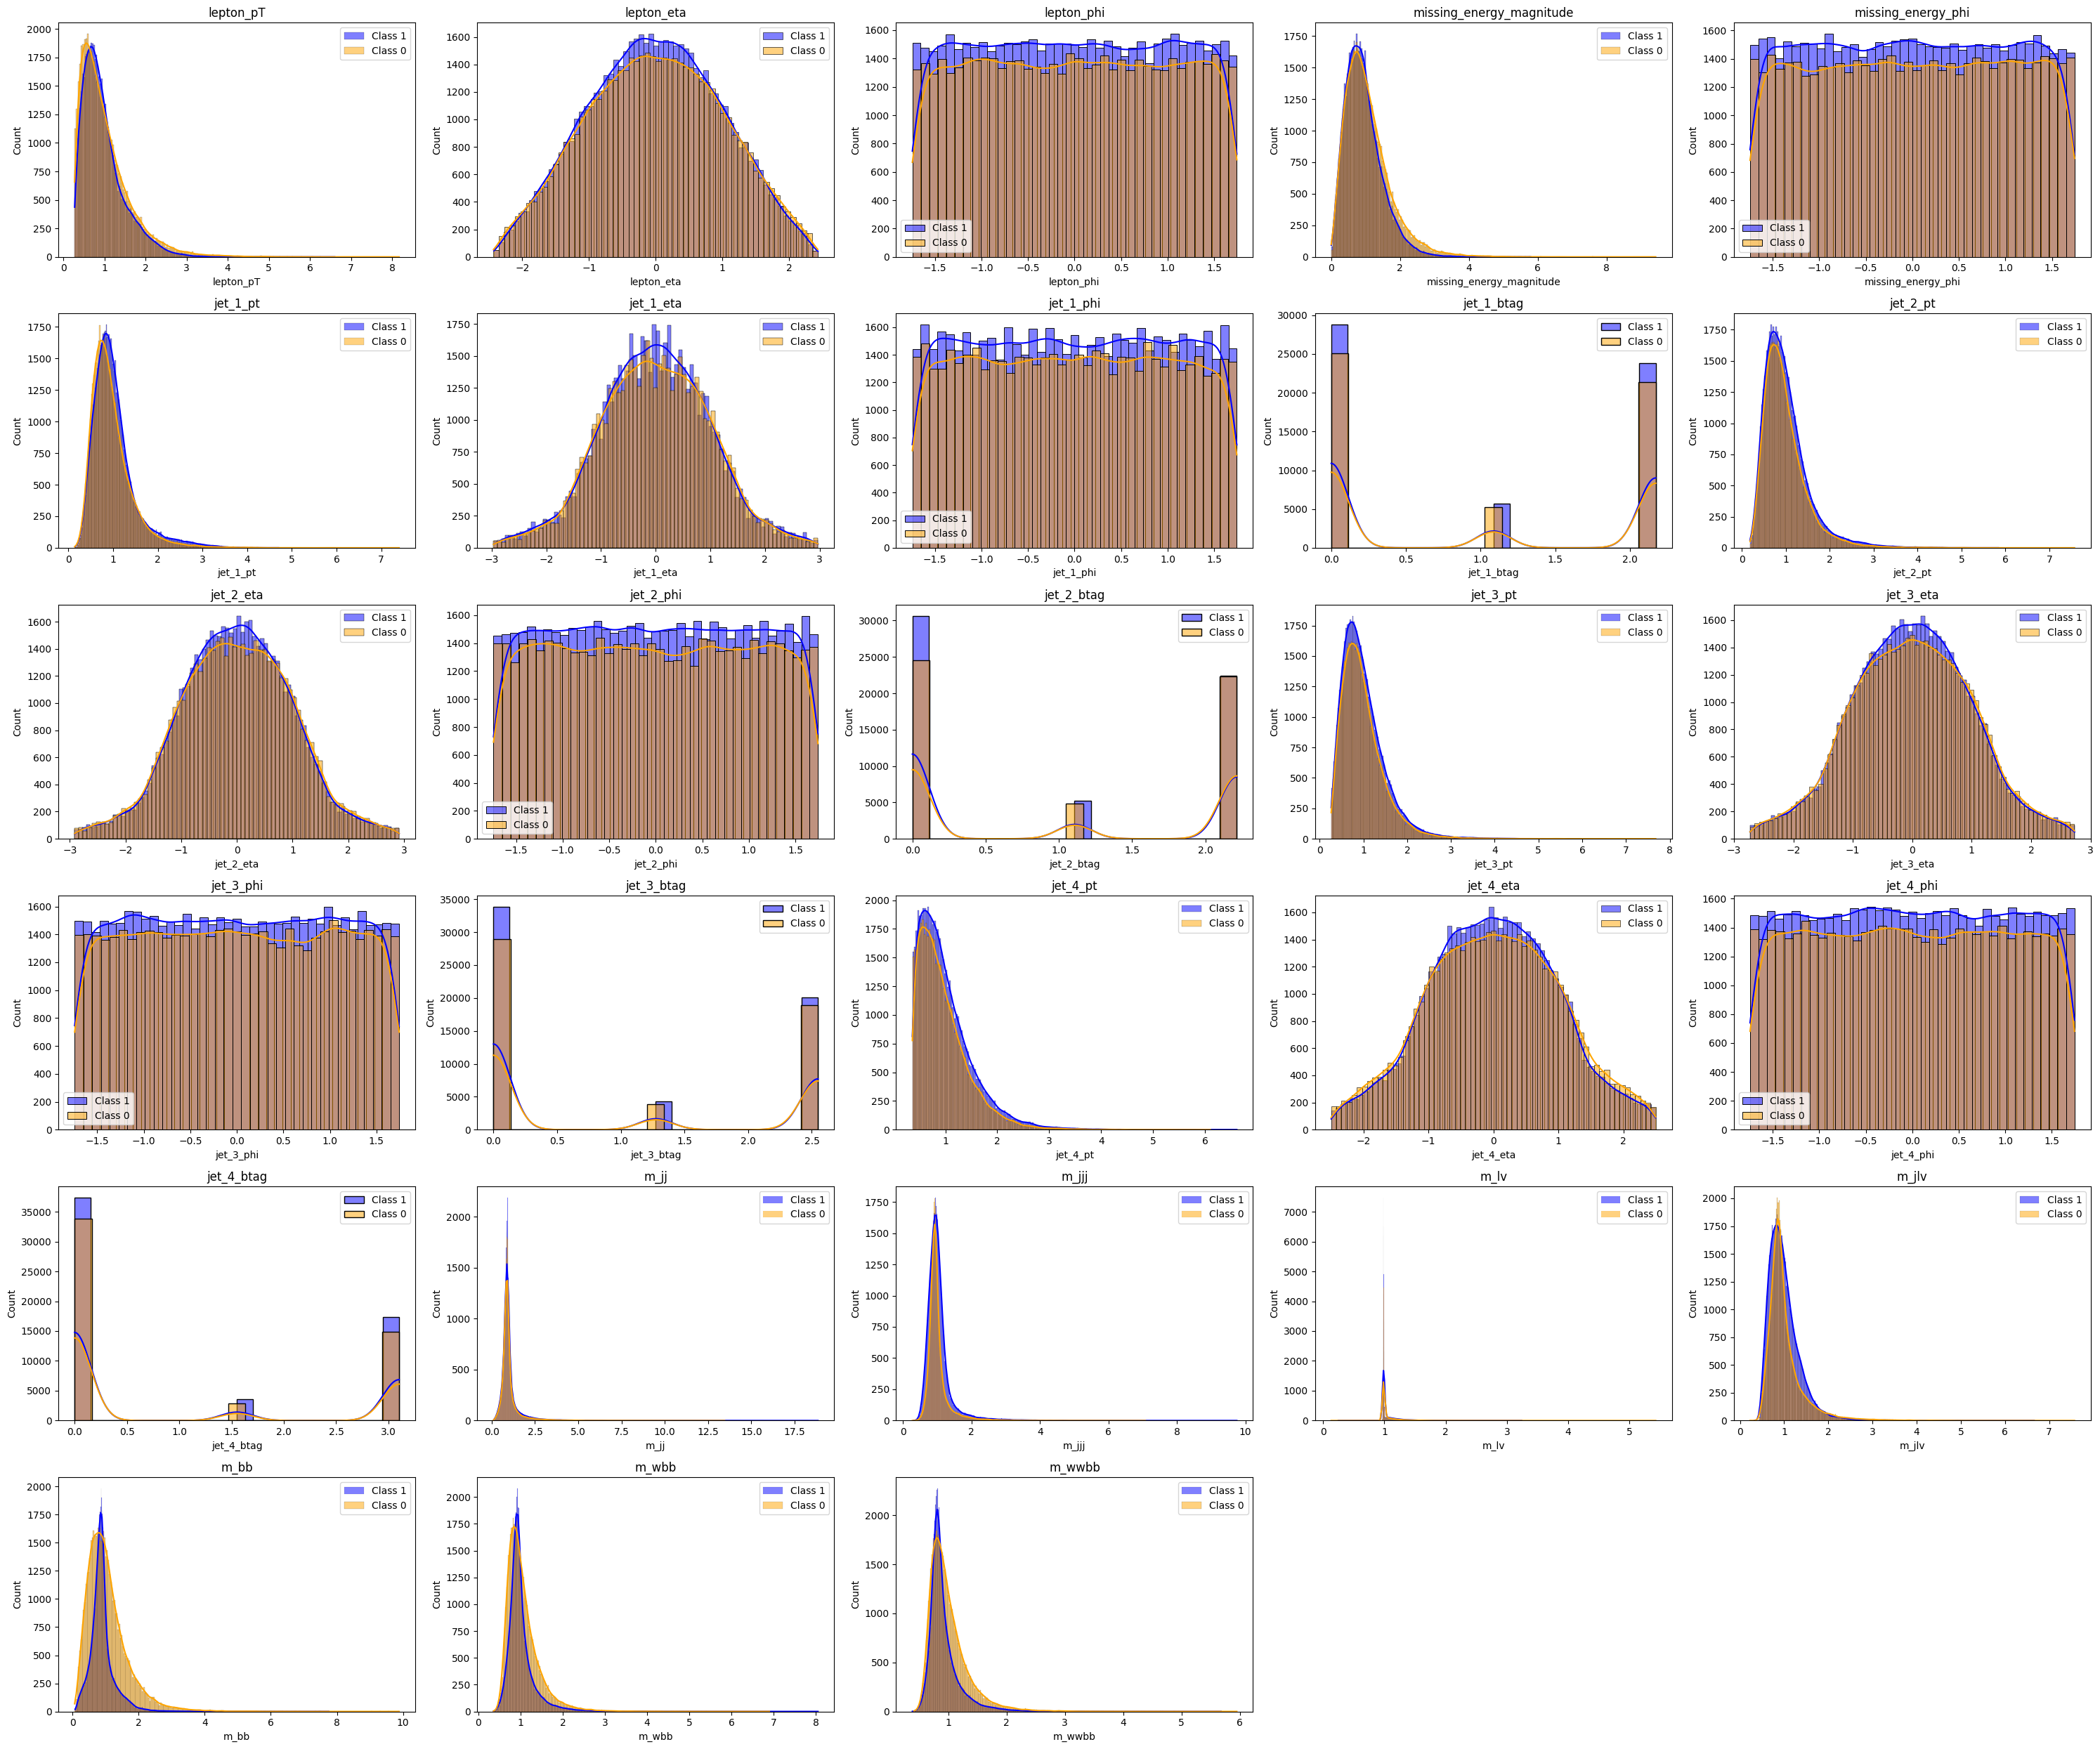

In [86]:
# Plot distributions using seaborn for better visualization
total_columns = len(df.columns) - 1
num_cols = 5
num_rows = (total_columns // num_cols) + 1

plt.figure(figsize=(30, 25))
for i, col in enumerate(df.drop(columns=[y_col]).columns):
    plt.subplot(num_rows, num_cols, i+1)
    
    # Using seaborn's kdeplot for smoother distribution visualization
    sns.histplot(data=df[df[y_col] == 1][col], color='blue', label='Class 1', fill=True, alpha=0.5, kde=True)
    sns.histplot(data=df[df[y_col] == 0][col], color='orange', label='Class 0', fill=True, alpha=0.5, kde=True)
    
    plt.title(col, fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()



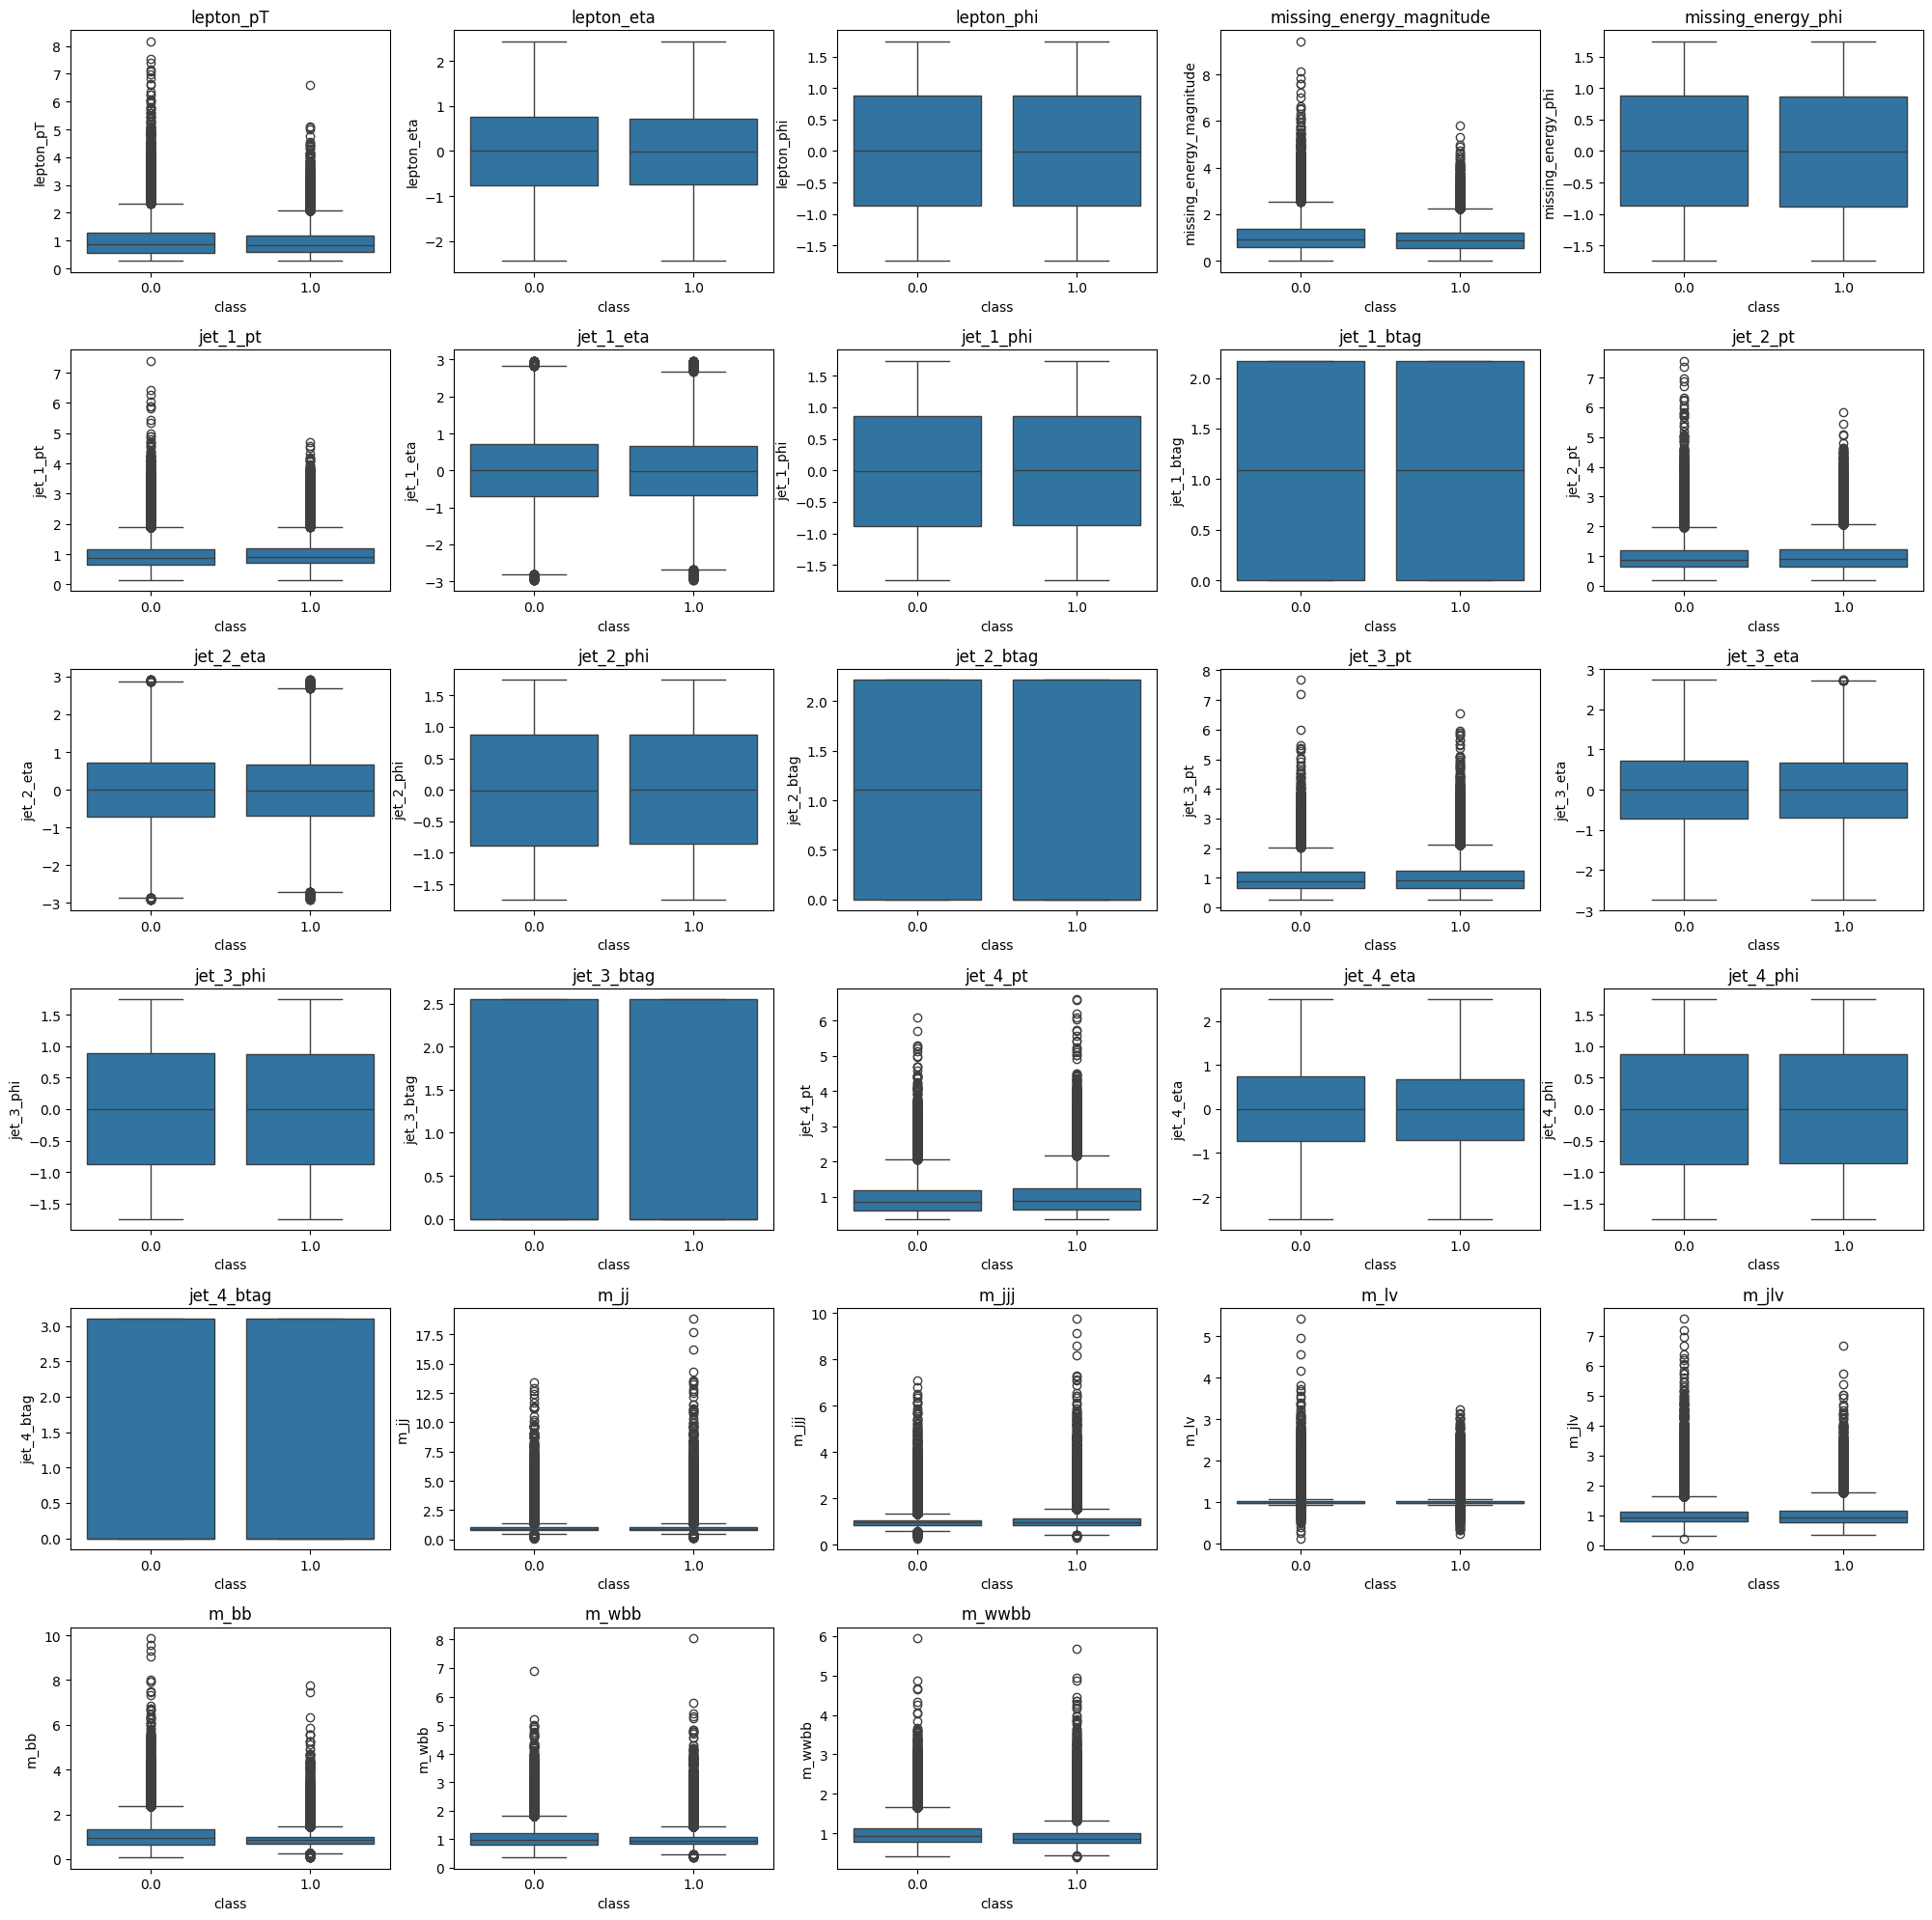

In [47]:
# conditional boxplots of all the features with respect to the classes 0 and 1
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.drop(columns=[y_col]).columns):
    plt.subplot(6, 5, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


The box plots of the features conditional on the class show that the features have no charactersitic differences between the classes

We can also see that nearly half the features have values outside the whiskers of the box plots. 
This means that we cannot ignore such values as outliers, as they are present in a significant number.
Thus outlier detecter for this dataset is not a good idea and we can proceed with the normalization/standardization of the features

We can apply outlier removal for the features that have more points around the median and very few outside the whiskers. The technique used will be Z-score

In [48]:
# Function to remove outliers based on z-score
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[abs(z_scores) < threshold]

# Get list of columns containing 'eta' or 'phi'
angle_columns = [col for col in df.columns if ('eta' in col or 'phi' in col)]

# Apply outlier removal to these columns
for col in angle_columns:
    df = remove_outliers_zscore(df, col)


In [67]:
# splitting the data into features and target
X = df.drop('class', axis=1)
y = df['class']

X = pd.DataFrame(X, columns = df.columns[1:])
y = pd.DataFrame(y, columns = [y_col])

X.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.795907,0.521993,1.266055,1.193820,-1.345527,1.050368,0.023740,-0.202843,0.000000,0.997533,...,1.112191,0.023700,0.000000,1.042175,1.027780,0.985253,0.817024,0.931846,0.893235,0.815815
1,0.439039,-0.246468,-1.633201,2.165616,-1.280181,1.113852,0.099988,0.030652,0.000000,0.726967,...,1.272093,1.334957,3.101961,0.847423,1.107451,0.992869,0.645746,0.615797,1.053485,1.169667
2,0.792429,-0.225041,0.476488,0.216189,-0.653596,0.706933,-1.342777,1.307932,2.173076,0.611513,...,-1.075636,-1.354807,3.101961,0.812245,0.768737,0.984995,0.809043,0.516027,0.810711,0.770562
3,2.508689,0.605754,0.057012,1.908093,0.369292,1.448035,1.172407,-1.662516,2.173076,1.103544,...,1.333722,-1.187779,0.000000,0.483426,0.583755,0.980170,1.504814,0.745402,1.502971,1.080458
4,0.956040,-0.425679,0.380497,0.382192,1.287647,1.112112,1.256576,0.019010,2.173076,1.378392,...,-1.447075,0.845525,0.000000,1.010567,1.105782,0.990340,1.734094,1.841294,1.493804,1.189773


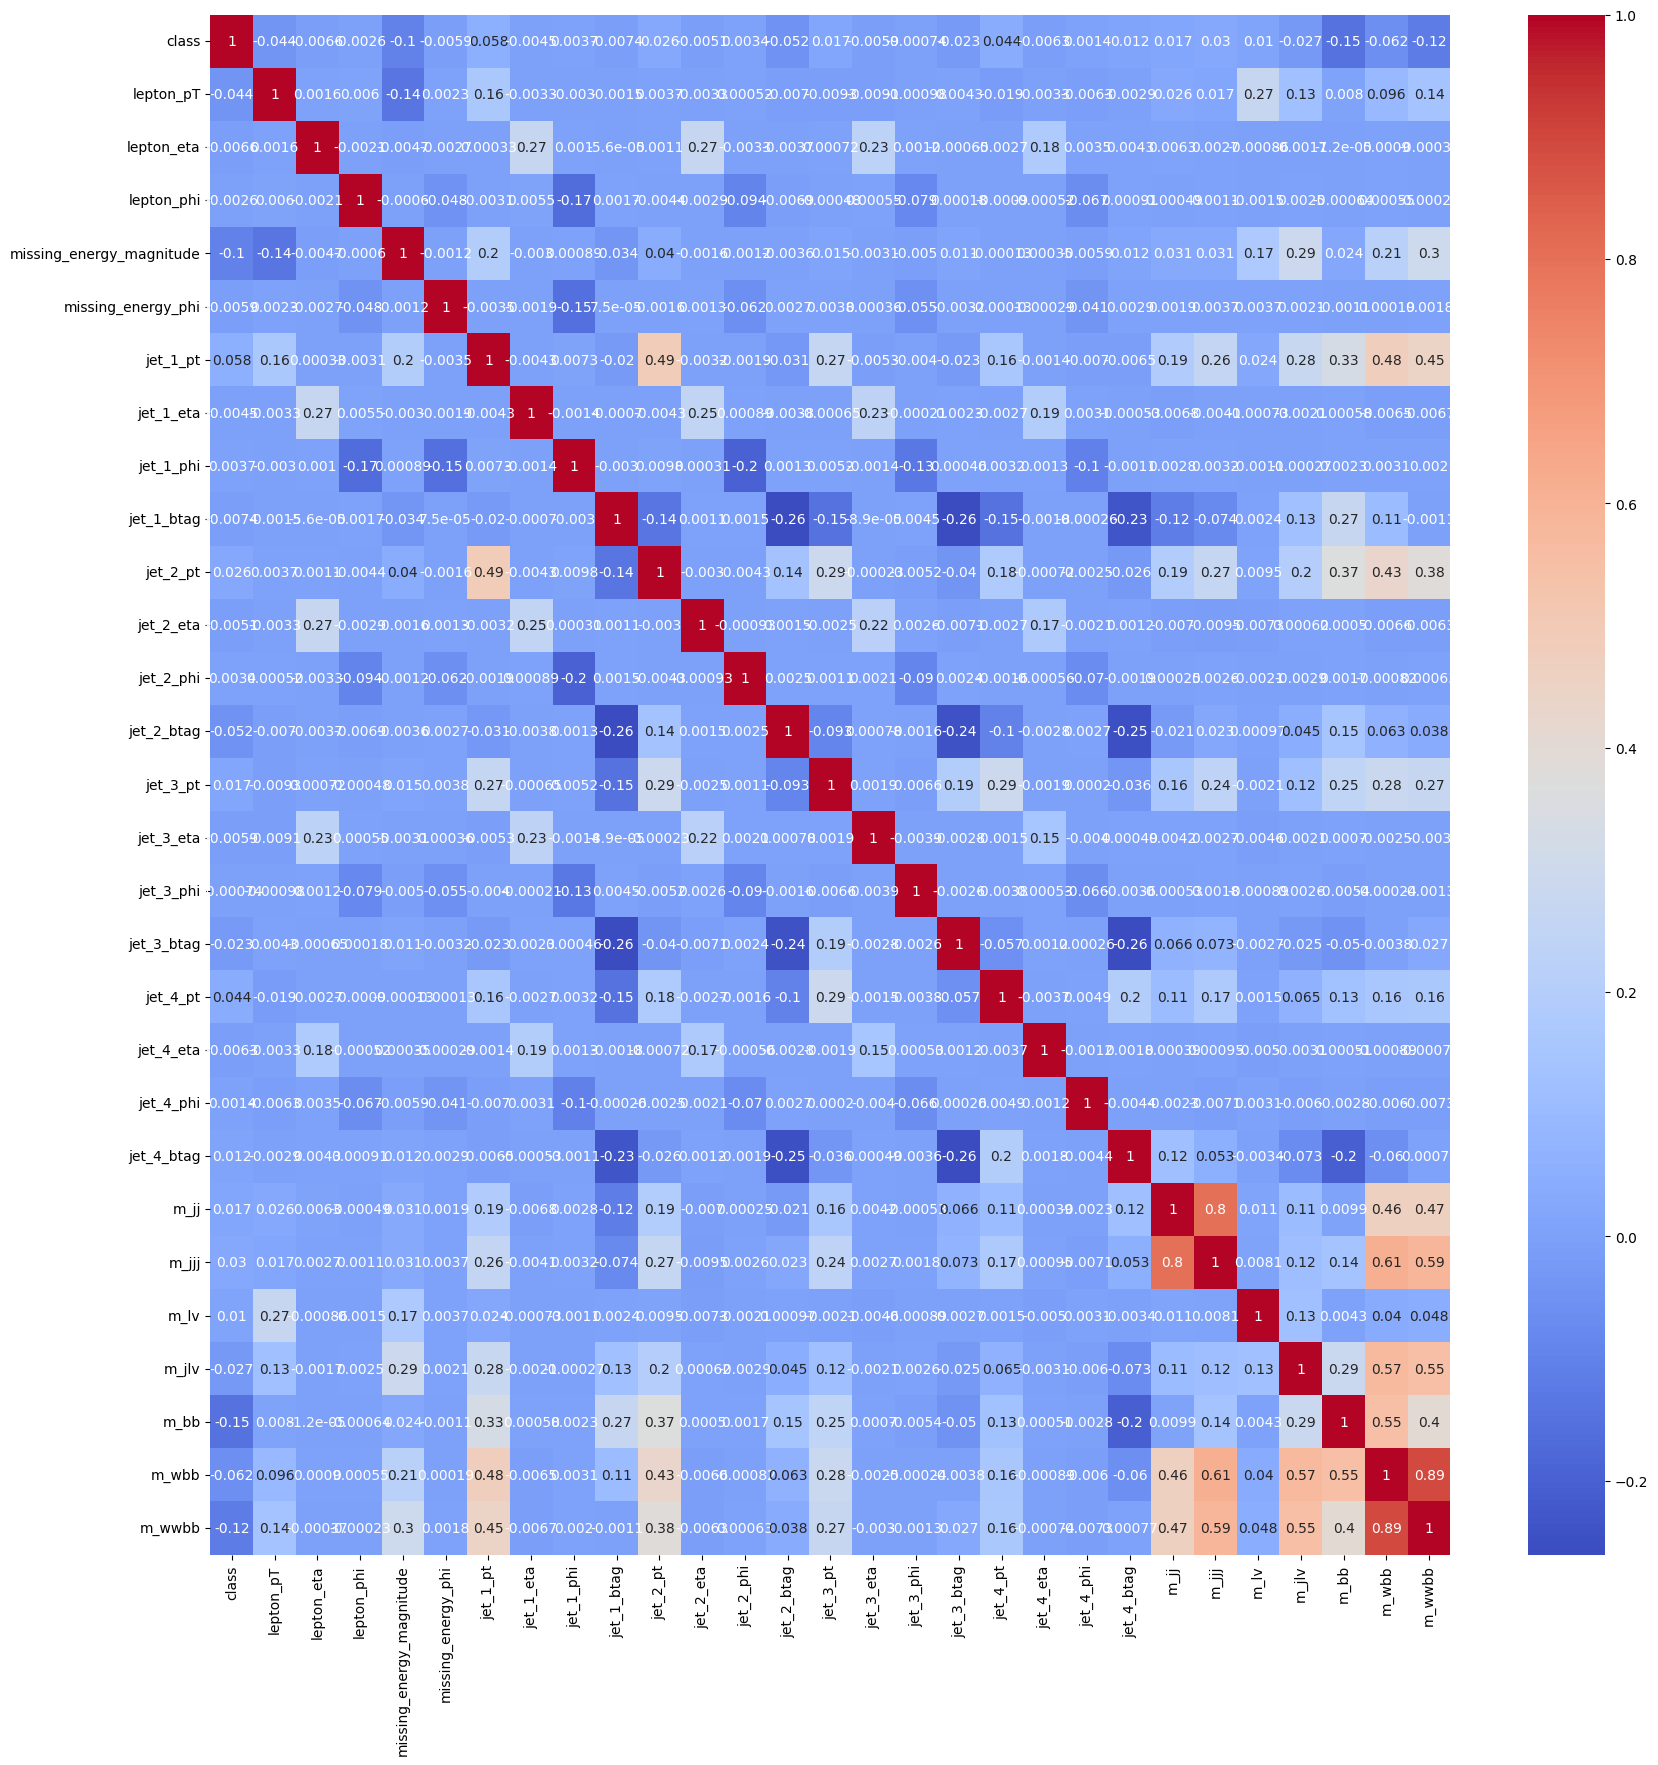

In [64]:
# correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


As evident in the correlation matrix, in general the features are not correlated with each other, but m_wbb and m_wwbb are highly correlated with each other which means we can drop one of them (wbb here)

In [71]:
# drop the column m_wbb
X_reduced = pd.DataFrame(X, columns = X.drop(columns=['m_wbb']).columns)

# X_reduced.head()

### Feature Engineering

Some insights were drawn from discussions with ChatGPT. It suggested added a new features that combined the "jets" by adding them.

The use of GPT enabled me to get an insight into the domain of the problem, without which, it could have been a little difficult to decide what type of engineering was required.


In [89]:
X_feat_eng = X_reduced.copy()

# adding the sum of the transverse momenta of the jets
X_feat_eng['sum_jet_pt'] = X_feat_eng['jet_1_pt'] + X_feat_eng['jet_2_pt'] + X_feat_eng['jet_3_pt'] + X_feat_eng['jet_4_pt']

# adding the sum of the btag values of the jets
X_feat_eng['sum_jet_eta'] = X_feat_eng['jet_1_eta'] + X_feat_eng['jet_2_eta'] + X_feat_eng['jet_3_eta'] + X_feat_eng['jet_4_eta']
X_feat_eng['sum_jet_phi'] = X_feat_eng['jet_1_phi'] + X_feat_eng['jet_2_phi'] + X_feat_eng['jet_3_phi'] + X_feat_eng['jet_4_phi']

X_feat_eng['mass_combination'] = X_feat_eng['m_bb'] + X_feat_eng['m_wwbb']
X_feat_eng['missing_energy_lepton_diff'] = X_feat_eng['missing_energy_magnitude'] - X_feat_eng['lepton_pT']

X_feat_eng.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,m_jjj,m_lv,m_jlv,m_bb,m_wwbb,sum_jet_pt,sum_jet_eta,sum_jet_phi,mass_combination,missing_energy_lepton_diff
0,0.795907,0.521993,1.266055,1.193820,-1.345527,1.050368,0.023740,-0.202843,0.000000,0.997533,...,1.027780,0.985253,0.817024,0.931846,0.815815,3.917854,0.868808,-0.244693,1.747661,0.397913
1,0.439039,-0.246468,-1.633201,2.165616,-1.280181,1.113852,0.099988,0.030652,0.000000,0.726967,...,1.107451,0.992869,0.645746,0.615797,1.169667,3.541985,0.550097,1.029781,1.785464,1.726577
2,0.792429,-0.225041,0.476488,0.216189,-0.653596,0.706933,-1.342777,1.307932,2.173076,0.611513,...,0.768737,0.984995,0.809043,0.516027,0.770562,3.019509,-5.414889,-1.475345,1.286590,-0.576241
3,2.508689,0.605754,0.057012,1.908093,0.369292,1.448035,1.172407,-1.662516,2.173076,1.103544,...,0.583755,0.980170,1.504814,0.745402,1.080458,3.434097,4.144453,-3.058275,1.825860,-0.600596
4,0.956040,-0.425679,0.380497,0.382192,1.287647,1.112112,1.256576,0.019010,2.173076,1.378392,...,1.105782,0.990340,1.734094,1.841294,1.189773,3.664320,1.738982,-1.922048,3.031067,-0.573847


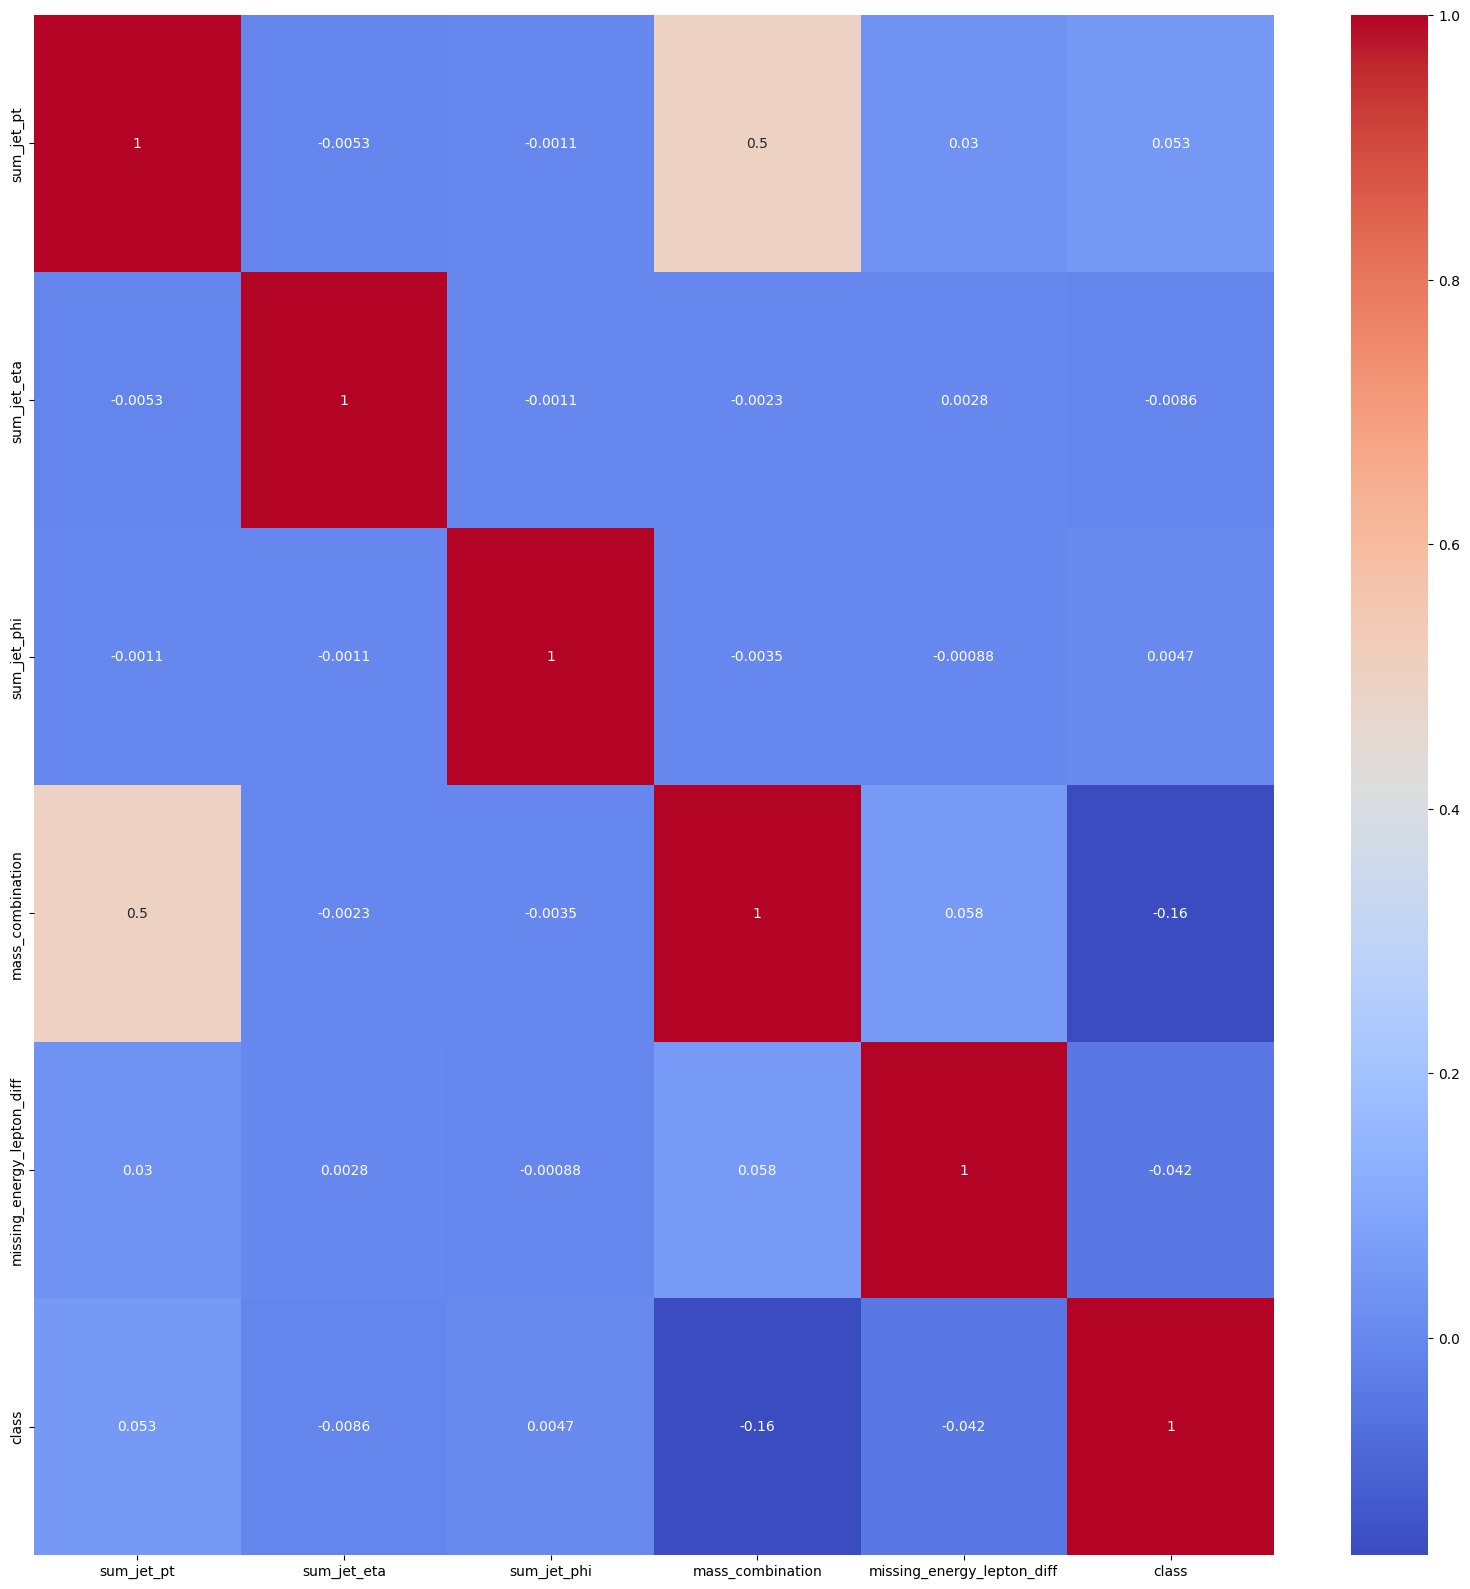

In [90]:
# see correlation of new features with the target
# create a temporary df to store only the new features and the target
temp_df = X_feat_eng.iloc[:, 27:33]
temp_df['class'] = y

corr_matrix = temp_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [91]:
# the correlation seems to improve a little for sum_jet_ptand mass_combination
# thus we can keep these features and drop the rest

X_feat_eng = X_feat_eng.drop(columns=['sum_jet_eta', 'sum_jet_phi', 'missing_energy_lepton_diff'])

X_feat_eng.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wwbb,sum_jet_pt,mass_combination
0,0.795907,0.521993,1.266055,1.193820,-1.345527,1.050368,0.023740,-0.202843,0.000000,0.997533,...,0.023700,0.000000,1.042175,1.027780,0.985253,0.817024,0.931846,0.815815,3.917854,1.747661
1,0.439039,-0.246468,-1.633201,2.165616,-1.280181,1.113852,0.099988,0.030652,0.000000,0.726967,...,1.334957,3.101961,0.847423,1.107451,0.992869,0.645746,0.615797,1.169667,3.541985,1.785464
2,0.792429,-0.225041,0.476488,0.216189,-0.653596,0.706933,-1.342777,1.307932,2.173076,0.611513,...,-1.354807,3.101961,0.812245,0.768737,0.984995,0.809043,0.516027,0.770562,3.019509,1.286590
3,2.508689,0.605754,0.057012,1.908093,0.369292,1.448035,1.172407,-1.662516,2.173076,1.103544,...,-1.187779,0.000000,0.483426,0.583755,0.980170,1.504814,0.745402,1.080458,3.434097,1.825860
4,0.956040,-0.425679,0.380497,0.382192,1.287647,1.112112,1.256576,0.019010,2.173076,1.378392,...,0.845525,0.000000,1.010567,1.105782,0.990340,1.734094,1.841294,1.189773,3.664320,3.031067


In [92]:
# Apply log-transformation to the feautres having either "pt" or "m_" in their names
log_transform_columns = [col for col in X_feat_eng.columns if (('pt' in col and 'lepton' not in col) or ('m_' in col and 'sum_' not in col))]

#calculate the skewness of the columns
skewness = X_feat_eng[log_transform_columns].apply(lambda x: x.skew())

X_log_transformed = X_feat_eng.copy()

X_log_transformed[log_transform_columns] = np.log1p(X_feat_eng[log_transform_columns])

#calculate the skewness of the columns after log transformation
skewness_after = X_log_transformed[log_transform_columns].apply(lambda x: x.skew())

print("Skewness before log transformation: \n", skewness)
print("\nSkewness after log transformation: \n", skewness_after)

Skewness before log transformation: 
 jet_1_pt      1.937147
jet_2_pt      1.995108
jet_3_pt      1.712236
jet_4_pt      1.690260
m_jj          6.061932
m_jjj         4.683738
m_lv          4.677056
m_jlv         2.812505
m_bb          2.465190
m_wwbb        2.546844
sum_jet_pt    1.615023
dtype: float64

Skewness after log transformation: 
 jet_1_pt      0.918155
jet_2_pt      0.842220
jet_3_pt      0.688003
jet_4_pt      0.817486
m_jj          2.601662
m_jjj         2.423166
m_lv          3.536289
m_jlv         1.413076
m_bb          0.826520
m_wwbb        1.576231
sum_jet_pt    0.645506
dtype: float64


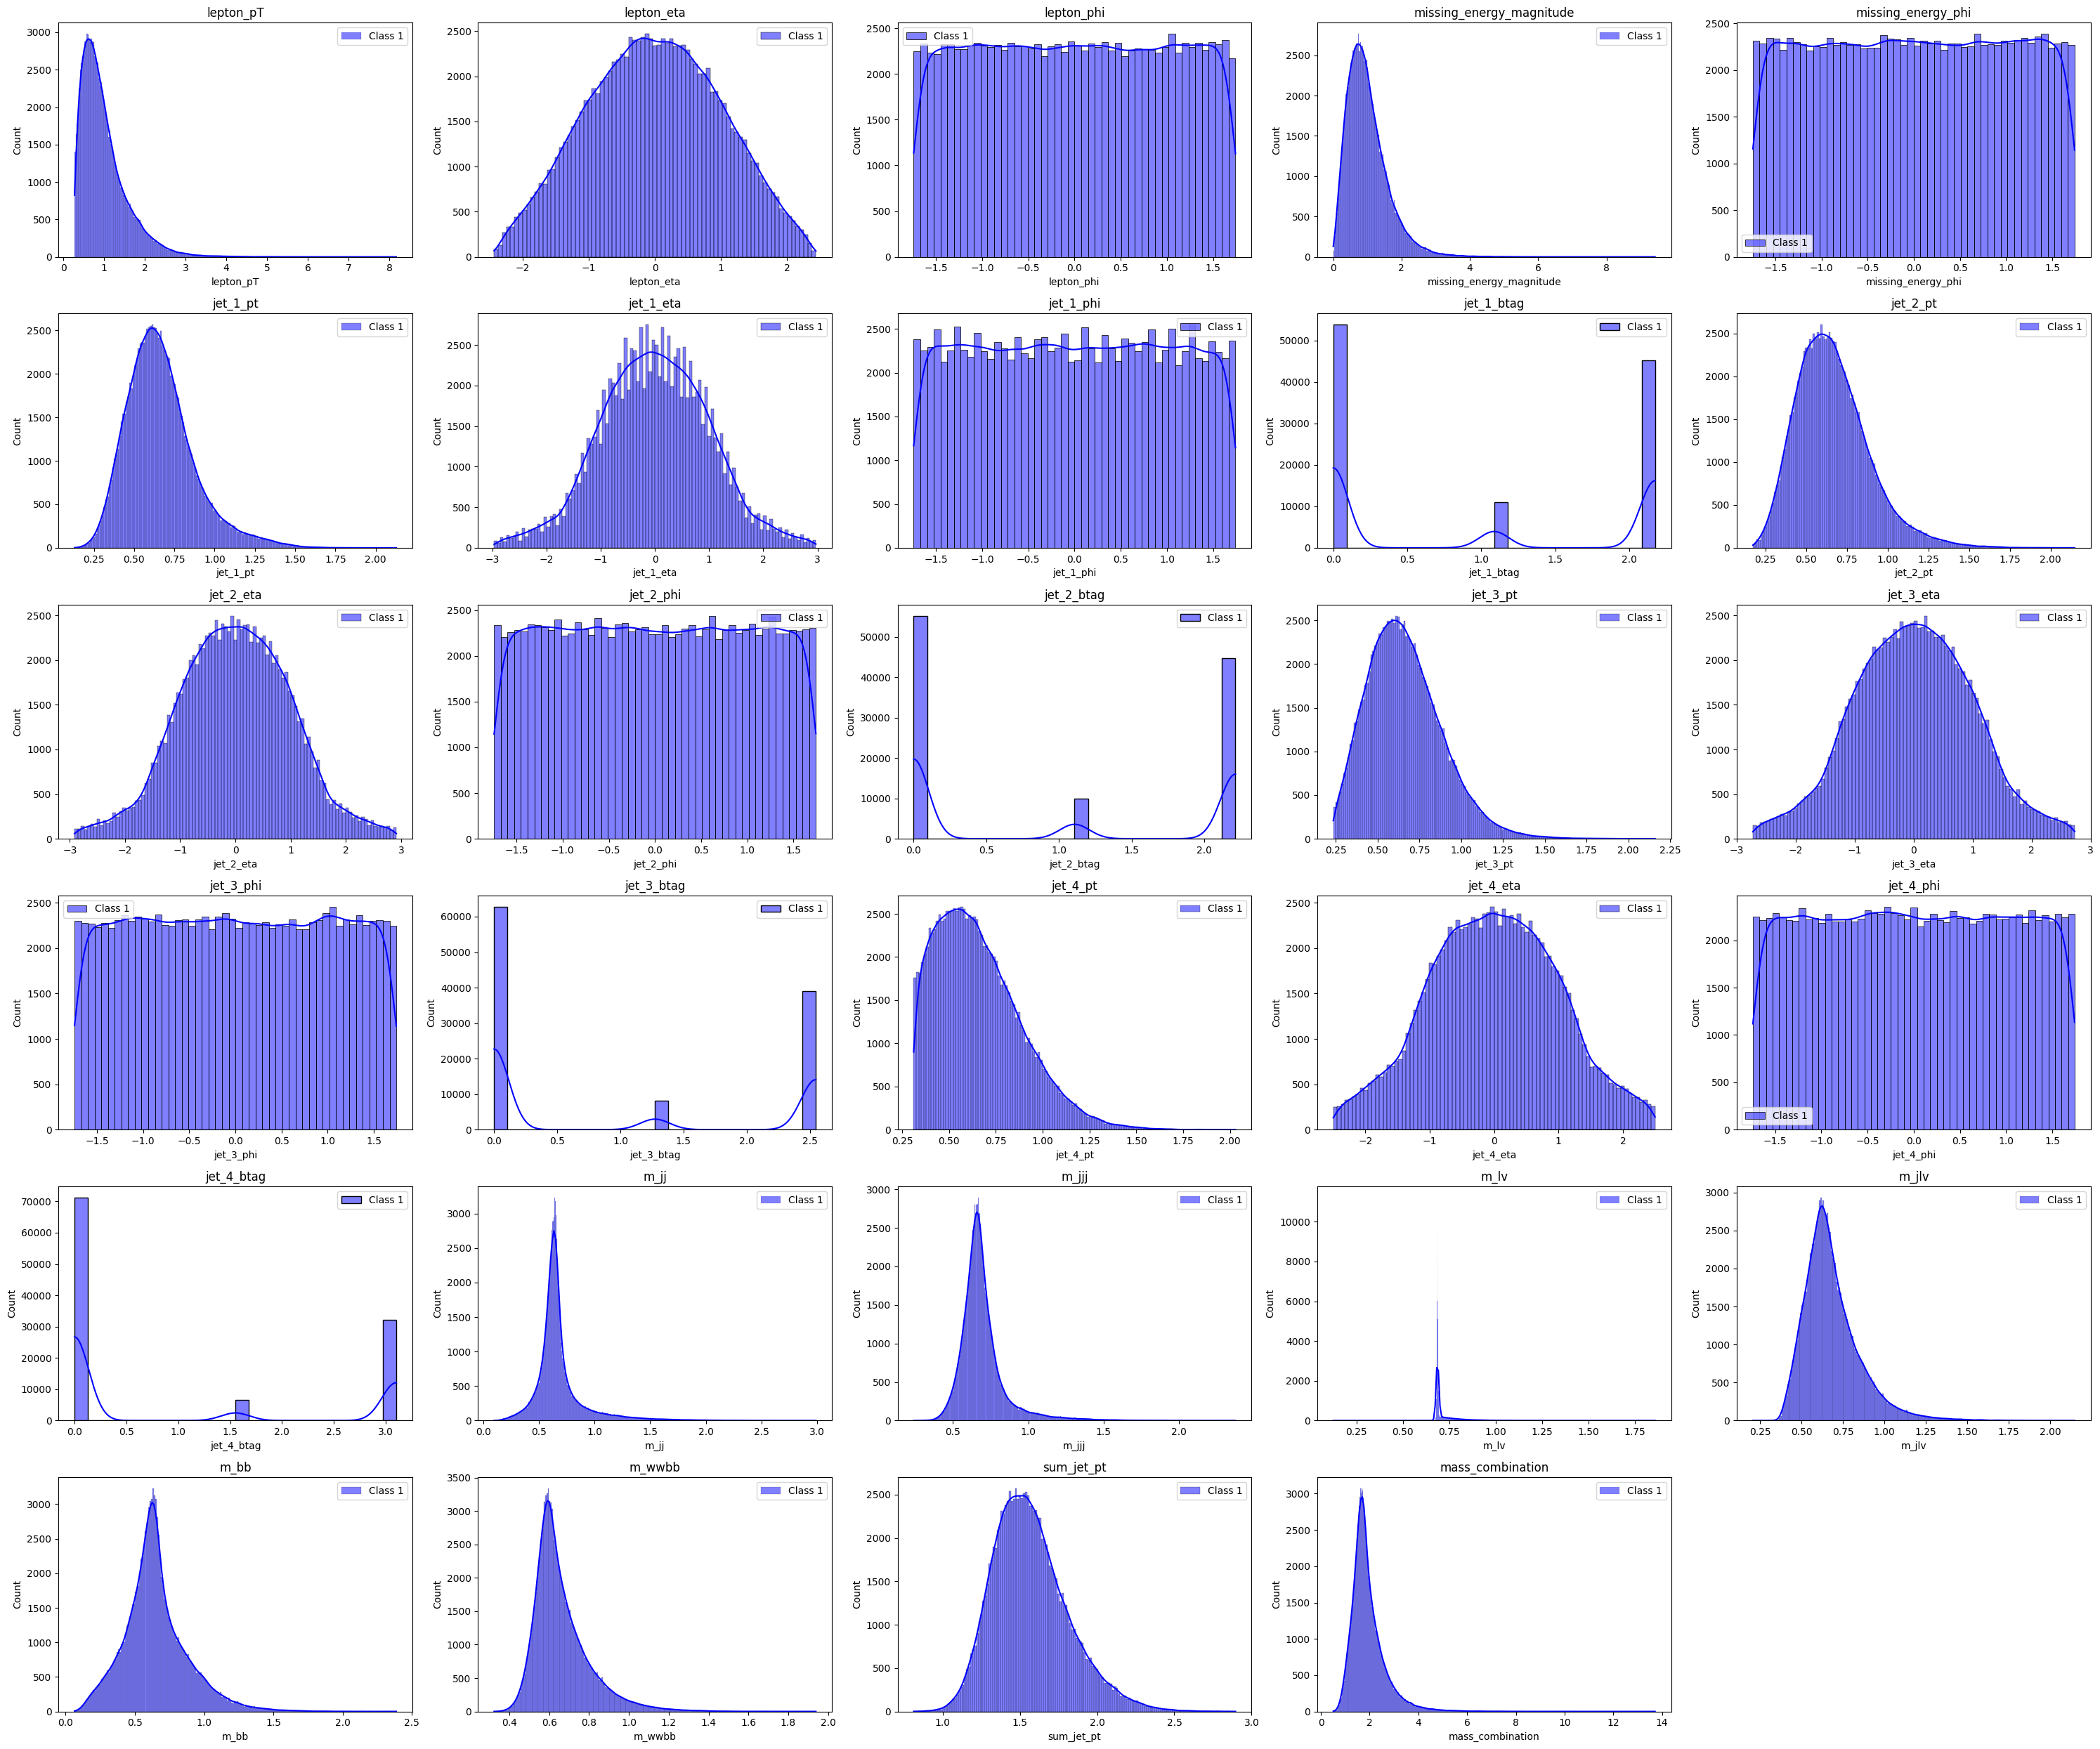

In [93]:
# visualize the distributions of the features after the changes

plt.figure(figsize=(30, 25))
for i, col in enumerate(X_log_transformed.columns):
    plt.subplot(num_rows, num_cols, i+1)
    
    # Using seaborn's kdeplot for smoother distribution visualization
    sns.histplot(data=X_log_transformed[col], color='blue', label='Class 1', fill=True, alpha=0.5, kde=True)
    
    plt.title(col, fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

### Data Normalization


We will normalize the data such that mean is 0 and standard deviation is 1

In [94]:
for col in X_log_transformed.columns:
    X_log_transformed[col] = (X_log_transformed[col] - X_log_transformed[col].mean()) / X_log_transformed[col].std()

X_log_transformed.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wwbb,sum_jet_pt,mass_combination
count,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,...,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05
mean,3.178064e-17,2.286656e-17,2.344791e-17,1.756978e-17,2.968131e-17,1.612286e-16,-2.015358e-17,2.467521e-17,-1.087453e-16,4.919540e-16,...,-5.942721e-18,-3.539795e-17,1.251847e-16,1.077829e-15,-6.617091e-16,1.149787e-17,-4.237418e-17,-1.818989e-16,-6.015067e-16,1.860330e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.262929e+00,-2.407172e+00,-1.733806e+00,-1.657815e+00,-1.732381e+00,-2.524021e+00,-2.945207e+00,-1.727146e+00,-9.747967e-01,-2.195066e+00,...,-1.733123e+00,-7.150585e-01,-2.597715e+00,-3.030603e+00,-8.436012e+00,-2.809967e+00,-2.539388e+00,-2.411518e+00,-3.106324e+00,-2.009037e+00
25%,-7.085638e-01,-7.322735e-01,-8.666932e-01,-7.029948e-01,-8.660003e-01,-6.868245e-01,-6.772768e-01,-8.668118e-01,-9.747967e-01,-7.124902e-01,...,-8.638557e-01,-7.150585e-01,-4.348321e-01,-5.348302e-01,-4.198297e-01,-6.606247e-01,-5.872042e-01,-6.460482e-01,-7.088038e-01,-5.976256e-01
50%,-2.443313e-01,-1.074799e-03,-5.785335e-04,-1.784978e-01,-1.274844e-04,-1.205696e-01,-6.425388e-03,-1.367444e-04,8.283152e-02,-1.134442e-01,...,-5.065908e-03,-7.150585e-01,-1.810676e-01,-1.659412e-01,-3.911515e-01,-1.835232e-01,-9.656037e-02,-2.476011e-01,-1.099621e-01,-2.159053e-01
75%,4.295649e-01,7.320557e-01,8.692925e-01,4.914012e-01,8.677742e-01,5.171648e-01,6.801415e-01,8.616775e-01,1.140460e+00,5.670151e-01,...,8.655442e-01,1.499618e+00,1.148493e-01,2.779929e-01,-1.761818e-01,4.669209e-01,4.734096e-01,4.250516e-01,5.826945e-01,3.693150e-01
max,1.267470e+01,2.420478e+00,1.731441e+00,1.399068e+01,1.728003e+00,6.914752e+00,2.944142e+00,1.735239e+00,1.140460e+00,6.661106e+00,...,1.731915e+00,1.499618e+00,1.030789e+01,1.126523e+01,1.636028e+01,8.636824e+00,7.532833e+00,9.085773e+00,5.449909e+00,1.663610e+01


### Feature Selection

We will use the SelectKBest as our selection algorithm



In [106]:
# using f_classif as the scoring function
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_log_transformed, y)

X_new = pd.DataFrame(X_new, columns=X_log_transformed.columns[selector.get_support()])

# get the selected features
selected_features = X_log_transformed.columns[selector.get_support()]
selected_features

Index(['lepton_pT', 'lepton_eta', 'missing_energy_magnitude', 'jet_1_pt',
       'jet_1_btag', 'jet_2_pt', 'jet_2_btag', 'jet_3_pt', 'jet_3_btag',
       'jet_4_pt', 'jet_4_eta', 'jet_4_btag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv',
       'm_bb', 'm_wwbb', 'sum_jet_pt', 'mass_combination'],
      dtype='object')

### Model Training

In [97]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [98]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (88000, 20)
Test shape:  (22000, 20)


In [99]:
def print_classification_metrics(y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('ROC AUC:', roc_auc)

#### Linear SVM

In [100]:
linear_svm = LinearSVC(random_state = RANDOM_STATE)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# cross validation
cv_score_accuracy = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring='accuracy')
print('Cross Validation Accuracies:', cv_score_accuracy)
print('Cross Validation Accuracy (Avg):', sum(cv_score_accuracy)/len(cv_score_accuracy))

linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print_classification_metrics(y_test, y_pred)

Cross Validation Accuracies: [0.63130682 0.63318182 0.63210227 0.63494318 0.63670455]
Cross Validation Accuracy (Avg): 0.6336477272727273
Accuracy: 0.634
Precision: 0.6300302899177845
Recall: 0.7493566649511065
F1 Score: 0.684532204983545
ROC AUC: 0.6266605409458685


In [26]:
# Using GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=linear_svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# save the grid search results for different hyperparameters
grid_search_linear_results = pd.DataFrame(grid_search.cv_results_)
# keep only the mean test score and the hyperparameters
grid_search_linear_results = grid_search_linear_results[['param_C', 'mean_test_score']]
# print(grid_search_linear_results)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Best Estimator:', grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)
print_classification_metrics(y_test, y_pred)


Best Parameters: {'C': 1}
Best Score: 0.6219659090909091
Best Estimator: LinearSVC(C=1, random_state=42)
Accuracy: 0.6214090909090909
Precision: 0.6167169202720707
Recall: 0.7544175673357352
F1 Score: 0.6786527257996064
ROC AUC: 0.6129465519912093


In [27]:
%pip install scikit-optimize


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Using Bayesian Optimization to find the best hyperparameters
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
}

bayes_search = BayesSearchCV(estimator=linear_svm, search_spaces=param_space, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)
bayes_search.fit(X_train, y_train)

# save the bayesian search results for different hyperparameters
bayes_search_linear_results = pd.DataFrame(bayes_search.cv_results_)
# keep only the mean test score and the hyperparameters
bayes_search_linear_results = bayes_search_linear_results[['param_C', 'mean_test_score']]

print('Best Parameters:', bayes_search.best_params_)
print('Best Score:', bayes_search.best_score_)
print('Best Estimator:', bayes_search.best_estimator_)
y_pred = bayes_search.predict(X_test)
print_classification_metrics(y_test, y_pred)


Best Parameters: OrderedDict([('C', 10.764992482254613)])
Best Score: 0.6219659090909091
Best Estimator: LinearSVC(C=10.764992482254613, random_state=42)
Accuracy: 0.6214090909090909
Precision: 0.6167169202720707
Recall: 0.7544175673357352
F1 Score: 0.6786527257996064
ROC AUC: 0.6129465519912093


### Sensitivity Analysis 

We will see how changes in the hyperparameter C affect the SVM performance

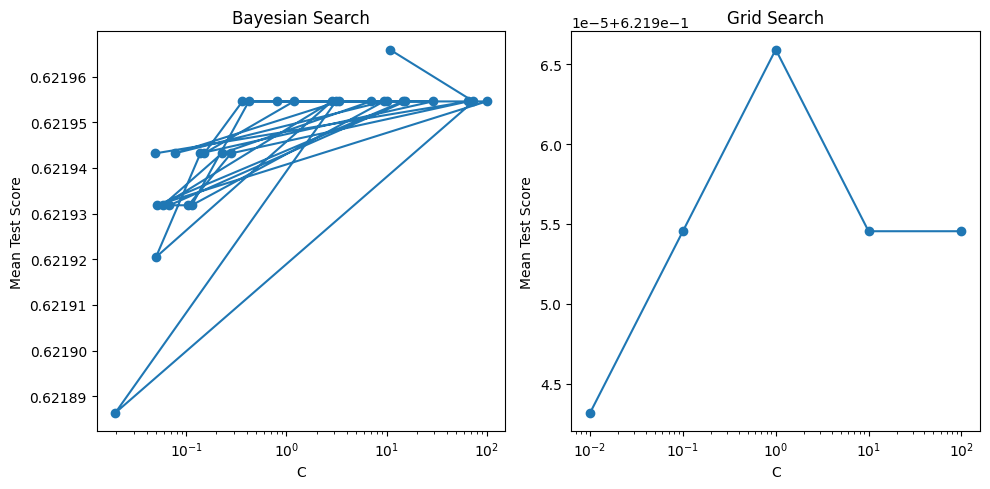

In [29]:
# plot the graph of mean_test_score with hyperparameter c for bayesian and grid search

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(bayes_search_linear_results['param_C'], bayes_search_linear_results['mean_test_score'], linestyle='-', marker='o')
plt.title('Bayesian Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

plt.subplot(1, 2, 2)
plt.plot(grid_search_linear_results['param_C'], grid_search_linear_results['mean_test_score'], linestyle='-', marker='o')
plt.title('Grid Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### SVM with other Kernels

In [39]:
X_new_small = X_new.sample(frac=0.05, random_state=RANDOM_STATE)
y_small = y.loc[X_new_small.index]

In [40]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_small, y_small, test_size=0.2, random_state=RANDOM_STATE, stratify=y_small)

#### Polynomial Kernals

In [41]:
data = []
for degree in (2, 3, 4):
    data_for_plot = {}
    data_for_plot['degree'] = degree
    
    model = SVC(random_state = RANDOM_STATE, kernel = 'poly', degree = degree)
    model.fit(X_train_new, y_train_new)
    y_pred = model.predict(X_test_new)
    
    data_for_plot['accuracy'] = accuracy_score(y_test_new, y_pred)
    data_for_plot['precision'] = precision_score(y_test_new, y_pred)
    data_for_plot['recall'] = recall_score(y_test_new, y_pred)
    data_for_plot['f1'] = f1_score(y_test_new, y_pred)
    data_for_plot['roc_auc'] = roc_auc_score(y_test_new, y_pred)
    
    data.append(data_for_plot)

print(pd.DataFrame(data))

   degree  accuracy  precision    recall        f1   roc_auc
0       2  0.556364   0.545195  0.982847  0.701346  0.529141
1       3  0.545455   0.539040  0.982847  0.696233  0.517536
2       4  0.546364   0.539326  0.987993  0.697759  0.518175


array([[<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>],
       [<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>],
       [<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>]], dtype=object)

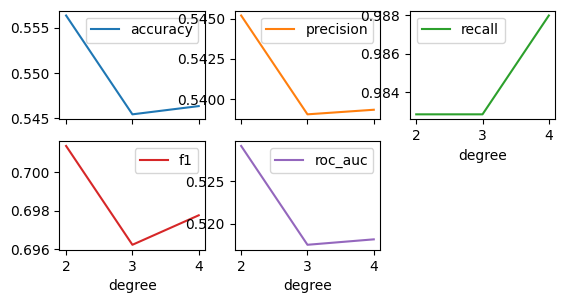

In [42]:
pd.DataFrame(data).set_index('degree').plot(subplots=True, layout=(3,3))

#### RBF Kernel


In [49]:
# data = []
# for gamma in (0.2):
#     data_for_plot = {}
#     data_for_plot['gamma'] = gamma
    
#     model = SVC(random_state = RANDOM_STATE, kernel = 'rbf', gamma = gamma)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     data_for_plot['accuracy'] = accuracy_score(y_test, y_pred)
#     data_for_plot['precision'] = precision_score(y_test, y_pred)
#     data_for_plot['recall'] = recall_score(y_test, y_pred)
#     data_for_plot['f1'] = f1_score(y_test, y_pred)
#     data_for_plot['roc_auc'] = roc_auc_score(y_test, y_pred)
    
#     data.append(data_for_plot)

gamma = 0.1
model = SVC(random_state = RANDOM_STATE, kernel = 'rbf', gamma = gamma)
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
print_classification_metrics(y_test_new, y_pred)


Accuracy: 0.6245454545454545
Precision: 0.6426174496644296
Recall: 0.6569468267581475
F1 Score: 0.6497031382527566
ROC AUC: 0.6224772818510274


array([[<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>],
       [<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>],
       [<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>]],
      dtype=object)

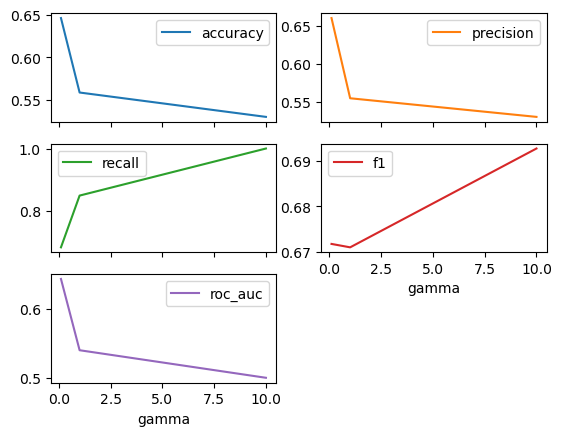

In [ ]:
# pd.DataFrame(data).set_index('gamma').plot(subplots=True, layout=(3,2))

In [ ]:
import numpy as np
from sklearn.svm import SVC

# Custom hybrid kernel combining RBF and Linear
def hybrid_kernel(X, Y, alpha=0.5, beta=0.5, gamma=0.1):
    # Ensure inputs are NumPy arrays
    X = np.array(X)
    Y = np.array(Y)
    
    # RBF component
    rbf_part = np.exp(-gamma * np.sum((X[:, None, :] - Y[None, :, :]) ** 2, axis=2))
    
    # Linear component
    linear_part = np.dot(X, Y.T)
    
    # Weighted combination of RBF and Linear
    return alpha * rbf_part + beta * linear_part

# Using the custom kernel in SVC
model = SVC(random_state=RANDOM_STATE, kernel=hybrid_kernel)

# Convert DataFrames to NumPy arrays for training and testing
X_train_new_np = X_train_new.to_numpy()
y_train_new_np = y_train_new.to_numpy()
X_test_new_np = X_test_new.to_numpy()
y_test_new_np = y_test_new.to_numpy()

# Fit the model
model.fit(X_train_new_np, y_train_new_np)

# Predict
y_pred = model.predict(X_test_new_np)

# Print classification metrics
print_classification_metrics(y_test_new_np, y_pred)

Accuracy: 0.64
Precision: 0.6463223787167449
Recall: 0.7084048027444254
F1 Score: 0.6759410801963993
ROC AUC: 0.6356337359950367


### Hyperparameter Tuning


In [54]:
# function to obtain the results using gridsearchCv

def get_results(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # save the grid search results for different hyperparameters
    grid_search_results = pd.DataFrame(grid_search.cv_results_)
    # keep only the mean test score and the hyperparameters
    grid_search_results = grid_search_results[['param_C', 'mean_test_score']]

    print('Best Parameters:', grid_search.best_params_)
    print('Best Score:', grid_search.best_score_)
    print('Best Estimator:', grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    
    return grid_search_results



In [56]:
# function to obtain the results using bayesian optimization

def get_bayes_results(X_train, y_train, X_test, y_test, model, param_space):
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)
    bayes_search.fit(X_train, y_train)

    # save the bayesian search results for different hyperparameters
    bayes_search_results = pd.DataFrame(bayes_search.cv_results_)
    # keep only the mean test score and the hyperparameters
    bayes_search_results = bayes_search_results[['param_C', 'mean_test_score']]

    print('Best Parameters:', bayes_search.best_params_)
    print('Best Score:', bayes_search.best_score_)
    print('Best Estimator:', bayes_search.best_estimator_)
    y_pred = bayes_search.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    
    return bayes_search_results

In [57]:
# function to plot the graph of mean_test_score with hyperparameter c for bayesian and grid search

def plot_graph(grid_search_results, bayes_search_results):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bayes_search_results['param_C'], bayes_search_results['mean_test_score'], linestyle='-', marker='o')
    plt.title('Bayesian Search')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')

    plt.subplot(1, 2, 2)
    plt.plot(grid_search_results['param_C'], grid_search_results['mean_test_score'], linestyle='-', marker='o')
    plt.title('Grid Search')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')

    plt.tight_layout()
    plt.show()



Best Parameters: {'C': 100}
Best Score: 0.6172727272727273
Best Estimator: SVC(C=100, degree=2, kernel='poly', random_state=42)
Accuracy: 0.6090909090909091
Precision: 0.5888501742160279
Recall: 0.869639794168096
F1 Score: 0.7022160664819944
ROC AUC: 0.5924601291923652
Best Parameters: OrderedDict([('C', 99.73706844630384)])
Best Score: 0.6177272727272728
Best Estimator: SVC(C=99.73706844630384, degree=2, kernel='poly', random_state=42)
Accuracy: 0.6090909090909091
Precision: 0.5888501742160279
Recall: 0.869639794168096
F1 Score: 0.7022160664819944
ROC AUC: 0.5924601291923652


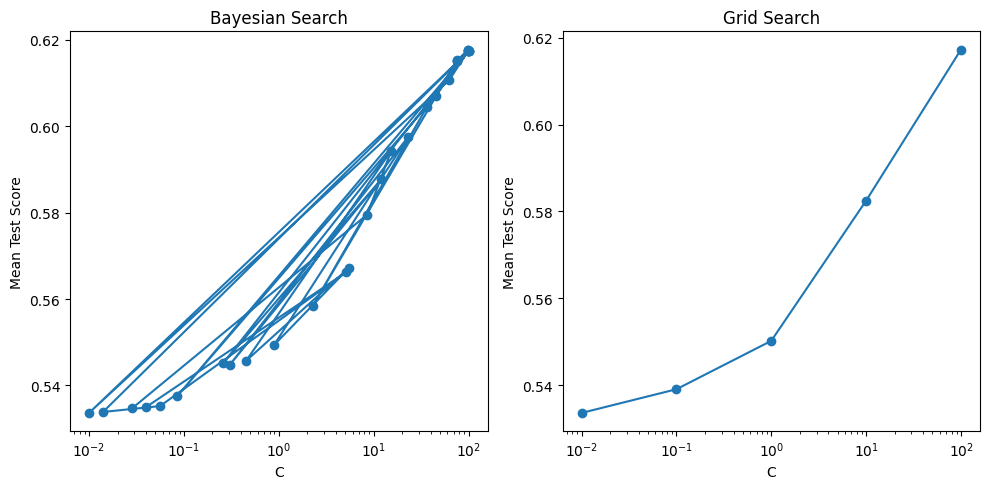

In [58]:
# get the results for the polynomial kernel that performed the best
model = SVC(random_state = RANDOM_STATE, kernel = 'poly', degree = 2)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search_results = get_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_grid)

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
}

bayes_search_results = get_bayes_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_space)

plot_graph(grid_search_results, bayes_search_results)


Best Parameters: {'C': 10, 'gamma': 0.01}
Best Score: 0.6438636363636363
Best Estimator: SVC(C=10, gamma=0.01, random_state=42)
Accuracy: 0.6472727272727272
Precision: 0.6484018264840182
Recall: 0.7307032590051458
F1 Score: 0.6870967741935484
ROC AUC: 0.641947374183424
Best Parameters: OrderedDict([('C', 2.766775653484181), ('gamma', 0.01)])
Best Score: 0.645
Best Estimator: SVC(C=2.766775653484181, gamma=0.01, random_state=42)
Accuracy: 0.6290909090909091
Precision: 0.6269956458635704
Recall: 0.7409948542024014
F1 Score: 0.6792452830188679
ROC AUC: 0.6219481040837926


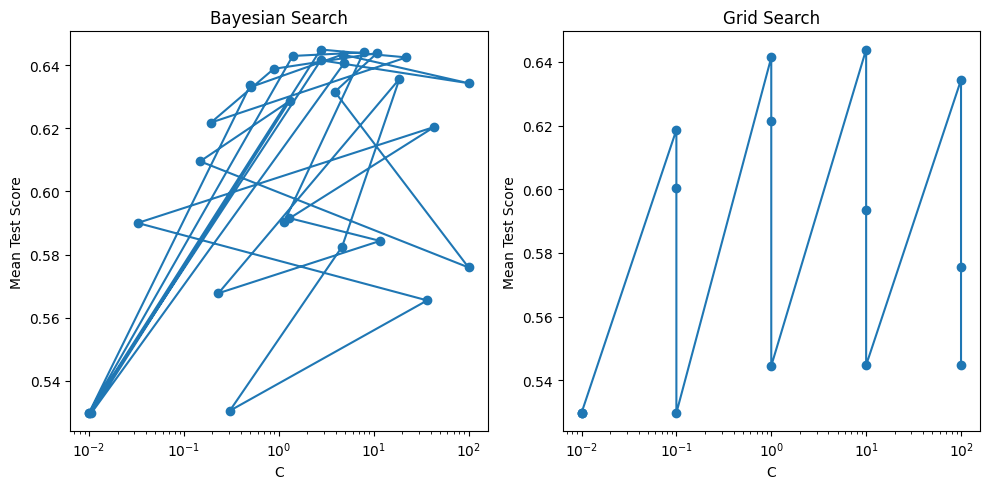

In [60]:
# get the results for the rbf kernel and also tuen the hyperparameter gamma

model = SVC(random_state = RANDOM_STATE, kernel = 'rbf')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1]
}

grid_search_results = get_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_grid)

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
    'gamma': Real(1e-2, 1, prior='log-uniform')
}

bayes_search_results = get_bayes_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_space)

plot_graph(grid_search_results, bayes_search_results)


In [ ]:
# perform hyperparameter tuning for the hybrid kernel without using the above functions

# Using the custom kernel in SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'alpha': [0.1, 0.5, 0.9],
    'beta': [0.1, 0.5, 0.9],
    'gamma': [0.01, 0.1, 1]
}

model = SVC(random_state=RANDOM_STATE, kernel=hybrid_kernel)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# save the grid search results for different hyperparameters
grid_search_results = pd.DataFrame(grid_search.cv_results_)
# keep only the mean test score and the hyperparameters
grid_search_results = grid_search_results[['param_C', 'param_alpha', 'param_beta', 'param_gamma', 'mean_test_score']]
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Best Estimator:', grid_search.best_estimator_)
y_pred = grid_search.predict(X_test_new)
print_classification_metrics(y_test_new, y_pred)


In [ ]:
#     def analyze_custom_kernel(self) -> Dict:
#         """
#         Analyze custom kernel (RBF + Linear) with different parameters
#         """
#         if 'custom' in self.results_cache:
#             return self.results_cache['custom']
        
#         # For custom kernel, we'll use a different approach since we can't directly use
#         # GridSearchCV with custom kernel parameters
        
#         param_grid = {
#             'C': np.logspace(-3, 3, 7),
#             'alpha': [0.25, 0.5, 0.75],
#             'beta': [0.25, 0.5, 0.75],
#             'gamma': np.logspace(-3, 3, 5)
#         }
        
#         best_score = -np.inf
#         best_params = None
#         best_results = None
        
#         for C in param_grid['C']:
#             for alpha in param_grid['alpha']:
#                 for beta in param_grid['beta']:
#                     for gamma in param_grid['gamma']:
#                         custom_kernel = partial(self.custom_kernel, alpha=alpha, beta=beta, gamma=gamma)
#                         model = SVC(kernel=custom_kernel, C=C, random_state=self.random_state)
                        
#                         # Time the training
#                         start_time = time.time()
#                         cv_results = cross_validate(model, self.X_scaled, self.y, 
#                                                  cv=5, scoring=self.scoring)
#                         training_time = time.time() - start_time
                        
#                         # Time prediction
#                         start_time = time.time()
#                         model.fit(self.X_scaled, self.y)
#                         model.predict(self.X_scaled[:1000])
#                         prediction_time = (time.time() - start_time) / 1000
                        
#                         current_score = cv_results['test_f1'].mean()
                        
#                         if current_score > best_score:
#                             best_score = current_score
#                             best_params = {
#                                 'C': C,
#                                 'alpha': alpha,
#                                 'beta': beta,
#                                 'gamma': gamma
#                             }
#                             best_results = {
#                                 'accuracy': (cv_results['test_accuracy'].mean(), 
#                                            cv_results['test_accuracy'].std()),
#                                 'precision': (cv_results['test_precision'].mean(),
#                                             cv_results['test_precision'].std()),
#                                 'recall': (cv_results['test_recall'].mean(),
#                                          cv_results['test_recall'].std()),
#                                 'f1': (cv_results['test_f1'].mean(),
#                                       cv_results['test_f1'].std()),
#                                 'roc_auc': (cv_results['test_roc_auc'].mean(),
#                                           cv_results['test_roc_auc'].std()),
#                                 'training_time': training_time,
#                                 'prediction_time': prediction_time
#                             }
        
#         results = {
#             'best_params': best_params,
#             **best_results
#         }
        
#         self.results_cache['custom'] = results
#         return results

#     def plot_parameter_sensitivity(self, kernel_type: str) -> None:
#         """
#         Plot sensitivity analysis for the specified kernel using CV results
#         """
#         results = self.results_cache.get(kernel_type)
#         if not results or 'cv_results' not in results:
#             print(f"No CV results found for kernel type: {kernel_type}")
#             return
            
#         cv_results = pd.DataFrame(results['cv_results'])
        
#         if kernel_type == 'rbf':
#             # Create heatmap for C and gamma
#             pivot_data = self._create_parameter_heatmap(
#                 cv_results, 'param_C', 'param_gamma', 'mean_test_f1')
#             plt.figure(figsize=(10, 8))
#             sns.heatmap(pivot_data, annot=True, fmt='.3f')
#             plt.xlabel('gamma')
#             plt.ylabel('C')
#             plt.title('F1 Score Sensitivity to C and gamma (RBF Kernel)')
            
#         elif kernel_type == 'poly':
#             # Create subplots for different degrees
#             degrees = sorted(set(cv_results['param_degree']))
#             fig, axes = plt.subplots(1, len(degrees), figsize=(15, 5))
#             for i, degree in enumerate(degrees):
#                 degree_data = cv_results[cv_results['param_degree'] == degree]
#                 pivot_data = self._create_parameter_heatmap(
#                     degree_data, 'param_C', 'param_gamma', 'mean_test_f1')
#                 sns.heatmap(pivot_data, annot=True, fmt='.3f', ax=axes[i])
#                 axes[i].set_title(f'Degree {degree}')
#                 axes[i].set_xlabel('gamma')
#                 axes[i].set_ylabel('C')
#             plt.suptitle('F1 Score Sensitivity (Polynomial Kernel)')
            
#         plt.tight_layout()
#         plt.show()

#     def _create_parameter_heatmap(self, cv_results, param1, param2, metric):
#         """Helper function to create heatmap data"""
#         return pd.pivot_table(
#             cv_results,
#             values=metric,
#             index=param1,
#             columns=param2,
#             aggfunc='mean'
#         )

# def main(X, y, use_random_search=True):
#     """
#     Run complete SVM analysis pipeline
#     """
#     analyzer = SVMAnalyzer(X, y, use_random_search=use_random_search)
    
#     # Store all results
#     results = {
#         'linear': analyzer.analyze_linear_svm(),
#         'poly': analyzer.analyze_polynomial_svm(),
#         'rbf': analyzer.analyze_rbf_svm(),
#         'custom': analyzer.analyze_custom_kernel()
#     }
    
#     # Find best performing kernel
#     best_kernel = max(results.items(), 
#                      key=lambda x: x[1]['f1'][0])[0]
    
#     # Create visualizations for parameter sensitivity
#     for kernel in ['rbf', 'poly']:  # Custom kernel has different parameter structure
#         analyzer.plot_parameter_sensitivity(kernel)
    
#     return {
#         'results': results,
#         'best_kernel': best_kernel
#     }

In [107]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [108]:
from typing import Dict
import time
results_cache = {}
use_random_search = True
n_iter = 10
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def _perform_search(estimator, param_grid, cv=5, use_random_search=True):
    """
    Perform either GridSearch or RandomizedSearch based on configuration
    """
    if use_random_search:
        search = RandomizedSearchCV(
            estimator=estimator,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=cv,
            scoring=scoring,
            refit='f1',  # Use F1 score to select best model
            random_state=RANDOM_STATE,
            n_jobs=-1,
        )
    else:
        search = GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
        )
    
    # Time the training
    start_time = time.time()
    search.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Time prediction
    start_time = time.time()
    search.predict(X_test)
    prediction_time = (time.time() - start_time) / 1000
    
    results = {
        'best_params': search.best_params_,
        'best_estimator': search.best_estimator_,
        'cv_results': search.cv_results_,
        'training_time': training_time,
        'prediction_time': prediction_time
    }
    
    # Add mean and std for each metric
    for metric in scoring.keys():
        results[metric] = (
            search.cv_results_[f'mean_test_{metric}'][search.best_index_],
            search.cv_results_[f'std_test_{metric}'][search.best_index_]
        )
        
    return results

In [132]:
def analyze_linear_svm() -> Dict:
    if 'linear' in results_cache:
        return results_cache['linear']
    
    param_grid = {
        'C': np.logspace(-3, 3, 7)
    }

    results = _perform_search(
        LinearSVC(random_state=RANDOM_STATE),
        param_grid,
        use_random_search=False
    )
    
    results_cache['linear'] = results
    return results

In [133]:
# anaylze the linear svm
results = analyze_linear_svm()
results

{'best_params': {'C': 1000.0},
 'best_estimator': LinearSVC(C=1000.0, random_state=42),
 'cv_results': {'mean_fit_time': array([2.15219283, 2.2794734 , 2.04379926, 1.87635312, 1.87739606,
         2.07811637, 1.99923072]),
  'std_fit_time': array([0.202549  , 0.21343611, 0.08971679, 0.05776145, 0.14283276,
         0.18345571, 0.1519152 ]),
  'mean_score_time': array([0.11657281, 0.11949186, 0.1091723 , 0.11959796, 0.16463814,
         0.18608031, 0.15608468]),
  'std_score_time': array([0.01995353, 0.0250177 , 0.02235722, 0.00800361, 0.04140981,
         0.0335557 , 0.0234465 ]),
  'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
               mask=[False, False, False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'C': 0.001},
   {'C': 0.01},
   {'C': 0.1},
   {'C': 1.0},
   {'C': 10.0},
   {'C': 100.0},
   {'C': 1000.0}],
  'split0_test_accuracy': array([0.62744318, 0.63      , 0.63119318, 0.63130682, 0.63136364,
         0.6313636

In [117]:
def analyze_polynomial_svm() -> Dict:
    if 'poly' in results_cache:
        return results_cache['poly']
    
    param_grid = {
        'C': np.logspace(-3, 3, 7),
        'degree': [2, 3, 4],
        'coef0': [0, 1],  # Added influence of higher-order terms
        'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 5))
    }
    
    results = _perform_search(
        SVC(kernel='poly', random_state=RANDOM_STATE),
        param_grid
    )
    
    results_cache['poly'] = results
    return results

In [118]:
# analyze the polynomial svm
results = analyze_polynomial_svm()
results

KeyboardInterrupt: 

In [ ]:
def analyze_rbf_svm() -> Dict:
    if 'rbf' in results_cache:
        return results_cache['rbf']
    
    param_grid = {
        'C': np.logspace(-3, 3, 7),
        'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 5))
    }
    
    results = _perform_search(
        SVC(kernel='rbf', random_state=RANDOM_STATE),
        param_grid
    )
    
    results_cache['rbf'] = results
    return results

In [ ]:
def custom_kernel(X1, X2, alpha=0.5, beta=0.5, gamma=1.0):
    # Ensure inputs are NumPy arrays
    X1 = np.array(X1)
    X2 = np.array(X2)

    linear = np.dot(X1, X2.T)
    squared_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    rbf = np.exp(-gamma * squared_dist)
    return alpha * linear + beta * rbf